In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,classification_report,confusion_matrix,mean_squared_error,mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [65]:
data=pd.read_csv("sales.csv")

In [66]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [68]:
#no nulls

In [69]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [70]:
df=data[['Order Date','Customer ID','City','Category','Sub-Category','Product Name','Sales']]

In [71]:
df

,Order Date,Customer ID,City,Category,Sub-Category,Product Name,Sales
0,08/11/2017,CG-12520,Henderson,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,08/11/2017,CG-12520,Henderson,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,12/06/2017,DV-13045,Los Angeles,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,11/10/2016,SO-20335,Fort Lauderdale,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,11/10/2016,SO-20335,Fort Lauderdale,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...
9795,21/05/2017,SH-19975,Chicago,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,12/01/2016,CS-12490,Toledo,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,12/01/2016,CS-12490,Toledo,Technology,Phones,GE 30524EE4,235.1880
9798,12/01/2016,CS-12490,Toledo,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [72]:
#segregrating 
# Converting the column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Extracting  the year
df['year'] = df['Order Date'].dt.year

C:\Users\ABI\AppData\Local\Temp\ipykernel_13092\3946656004.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
C:\Users\ABI\AppData\Local\Temp\ipykernel_13092\3946656004.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['Order Date'].dt.year


In [73]:
df['year']

0       2017
1       2017
2       2017
3       2016
4       2016
        ... 
9795    2017
9796    2016
9797    2016
9798    2016
9799    2016
Name: year, Length: 9800, dtype: int32

In [74]:
df['year'].value_counts()

year
2018    3258
2017    2534
2016    2055
2015    1953
Name: count, dtype: int64

In [75]:
le1=LabelEncoder()

In [76]:
df['Customer ID'] = le1.fit_transform(df['Customer ID'])

C:\Users\ABI\AppData\Local\Temp\ipykernel_13092\1685900285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Customer ID'] = le1.fit_transform(df['Customer ID'])


In [77]:
le2=LabelEncoder()

In [78]:
df['City'] = le2.fit_transform(df['City'])

C:\Users\ABI\AppData\Local\Temp\ipykernel_13092\1787752804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'] = le2.fit_transform(df['City'])


In [79]:
le3=LabelEncoder()

In [80]:
df['Category'] = le3.fit_transform(df['Category'])

C:\Users\ABI\AppData\Local\Temp\ipykernel_13092\511582597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'] = le3.fit_transform(df['Category'])


In [81]:
le4=LabelEncoder()

In [82]:
df['Sub-Category'] = le4.fit_transform(df['Sub-Category'])

C:\Users\ABI\AppData\Local\Temp\ipykernel_13092\2132205125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sub-Category'] = le4.fit_transform(df['Sub-Category'])


In [83]:
le5=LabelEncoder() 

In [84]:
df['Product Name'] = le5.fit_transform(df['Product Name'])

C:\Users\ABI\AppData\Local\Temp\ipykernel_13092\714956265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Product Name'] = le5.fit_transform(df['Product Name'])


In [85]:
df=df.drop('Order Date',axis=1)

In [86]:
dftest_2018 = df[df['year'] == 2018]

In [87]:
dftrain_years = df[df['year'] != 2018]

In [88]:
dftest_2018

,Customer ID,City,Category,Sub-Category,Product Name,Sales,year
12,2,96,1,12,1755,15.552,2018
23,684,372,0,5,745,71.372,2018
34,482,207,1,12,537,29.472,2018
41,452,319,2,13,1243,147.168,2018
43,278,286,1,14,115,95.616,2018
...,...,...,...,...,...,...,...
9768,745,436,1,12,1324,50.040,2018
9787,146,207,0,4,169,1023.332,2018
9788,146,207,0,5,742,600.558,2018
9789,146,207,2,0,954,39.992,2018


In [89]:
dftrain_years

,Customer ID,City,Category,Sub-Category,Product Name,Sales,year
0,143,194,0,4,386,261.9600,2017
1,143,194,0,5,838,731.9400,2017
2,237,265,1,10,1432,14.6200,2017
3,705,153,0,16,366,957.5775,2016
4,705,153,1,14,573,22.3680,2016
...,...,...,...,...,...,...,...
9795,691,80,1,3,408,3.7980,2017
9796,179,483,1,2,277,10.3680,2016
9797,179,483,2,13,724,235.1880,2016
9798,179,483,2,13,148,26.3760,2016


In [90]:
#checking correlations for dftrain_years

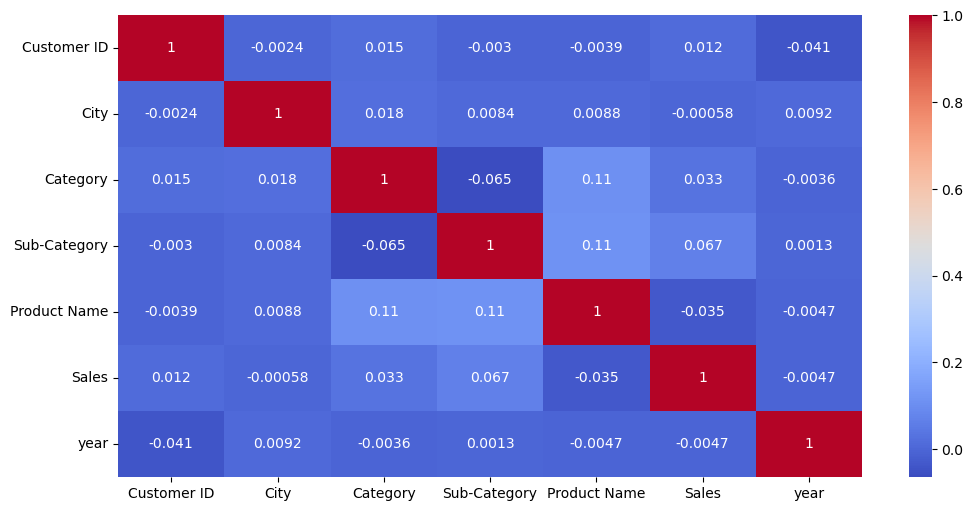

In [91]:
data_corr=dftrain_years.corr()
plt.figure(figsize=(12,6))
sns.heatmap(data_corr,annot=True,cmap='coolwarm')
plt.show()

In [92]:
# almost all the aolumns are independent. so proceeding with training dataset split

In [93]:
dftrain_years

,Customer ID,City,Category,Sub-Category,Product Name,Sales,year
0,143,194,0,4,386,261.9600,2017
1,143,194,0,5,838,731.9400,2017
2,237,265,1,10,1432,14.6200,2017
3,705,153,0,16,366,957.5775,2016
4,705,153,1,14,573,22.3680,2016
...,...,...,...,...,...,...,...
9795,691,80,1,3,408,3.7980,2017
9796,179,483,1,2,277,10.3680,2016
9797,179,483,2,13,724,235.1880,2016
9798,179,483,2,13,148,26.3760,2016


In [94]:
data_values=dftrain_years.drop('Sales',axis=1)
tar=dftrain_years['Sales']

In [95]:
train_data,test_data,train_lab,test_lab=train_test_split(data_values,tar,test_size=0.2,random_state=46)

In [96]:
model = LinearRegression()

In [97]:
model.fit(train_data, train_lab)

LinearRegression()

In [100]:
test_pred = model.predict(test_data)

In [109]:
mean_absolute_percentage_error(test_lab,test_pred)

12.313021669710293

In [103]:
rr_model=RandomForestRegressor()

In [104]:
rr_model.fit(train_data,train_lab)

RandomForestRegressor()

In [105]:
ts_pred=rr_model.predict(test_data)

In [108]:
mean_absolute_percentage_error(test_lab,ts_pred)

3.130942601960248

In [110]:
#now the model is ready 

In [111]:
#starting to test for the prediction for the year 2018 from the historical data

In [112]:
dftest_2018

,Customer ID,City,Category,Sub-Category,Product Name,Sales,year
12,2,96,1,12,1755,15.552,2018
23,684,372,0,5,745,71.372,2018
34,482,207,1,12,537,29.472,2018
41,452,319,2,13,1243,147.168,2018
43,278,286,1,14,115,95.616,2018
...,...,...,...,...,...,...,...
9768,745,436,1,12,1324,50.040,2018
9787,146,207,0,4,169,1023.332,2018
9788,146,207,0,5,742,600.558,2018
9789,146,207,2,0,954,39.992,2018


In [113]:
data_values_test=dftest_2018.drop('Sales',axis=1)
tar_test=dftest_2018['Sales']

In [ ]:
#now predicting for "2018" sales data 

In [114]:
ts_pred=rr_model.predict(data_values_test)

In [115]:
mean_absolute_percentage_error(tar_test,ts_pred)

3.2396134036497246

In [117]:
#the model is predicting good with low mean absolute percentage error for the new data